In [8]:
from keras.datasets import imdb
(X_data, y_data), (tt_x, tt_y) = imdb.load_data(num_words=500)  #500   등장빈도가 1~500 위까지의 단어를 추출 즉 500가지 단어를 뽑는다
                       
X_data.shape , y_data.shape, tt_x.shape, tt_y.shape


from sklearn.model_selection import train_test_split
t_x,v_x, t_y, v_y = train_test_split(X_data, y_data, test_size=0.2 , random_state=42)


from keras.preprocessing.sequence import pad_sequences
ck_t_x= pad_sequences(t_x, maxlen=100) # 최대길이를100으로        타임스텝의 수를 100으로 제한한다
ck_v_x= pad_sequences(v_x, maxlen=100)

In [9]:
from keras import Sequential
from keras.layers import SimpleRNN, Dense, Embedding, LSTM
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

m = Sequential()  
m.add(Embedding(500,16,input_length=100 ))  
  # 인풋렝스100  한묶음으로 한번에 들어가니까 한묶음의 길이 100으로
#심플rnn에 잇엇던 인풋이여기로 #500  500개단어   # 16 : 오백개의 단어를 16차원으로 정리    16차원으로 오백개의 단어를 표현하겠다.
    # 그래서 오백개로 원핫인코딩된 자료를 줄 필요가 없다  > 핏에서 c_ 대신 ck_
     # 원핫 안한 데이터를 자동으로 임베딩이 해준다
     # 16 차원에 점하나 찍은 벡터화  여기서 차원은 임의의 값 하이퍼매개변수
# 임베딩 단어 벡터화 - 임의의 좌표(16차원)에 한 점찍기
m.add( LSTM( 8)) #순환신경망  # 8은 cell 셀 수  (뉴런수)                      # 심플알엔엔보다 파라미터가 늘엇다 - 추가적인기억을하겟다
m.add(  Dense( 1, activation='sigmoid' ) ) #아웃풋1개   출력층 , 이진분류 시그모이드
m.summary()

#긍정리뷰 / 부정리뷰 분류




 # lstm대신 gru 셀로 도 해보자
 # m.add(LSTM(8 , dropout=0.3))  드롭아웃도 적용해서 해보자

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 100, 16)           8000      
                                                                 
 lstm_1 (LSTM)               (None, 8)                 800       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [3]:
t_y.shape

(20000,)

In [4]:
v_y.shape

(5000,)

In [5]:
ck_v_x.shape

(5000, 100)

In [11]:

m.compile(optimizer = RMSprop(learning_rate=0.0001) , loss='binary_crossentropy'  , metrics=['accuracy'])  # 옵티마이저 알엠 기본값
  # 로스펑션: 아웃풋기준 이진분류 - binary
#옵티마이저는 백프로파게이션으로 웨이트를 갱신하는 펑션
#액티베이션은 인풋>아웃풋 과정 안에서 노드를 거치면서 웨이트에 적용되는 펑션
  
es = EarlyStopping(patience= 4, restore_best_weights=True)
ck = ModelCheckpoint ('m.h5')

hy = m.fit(ck_t_x, t_y,  validation_data=(ck_v_x, v_y) ,  callbacks=[es,ck],  batch_size=64,  epochs=2  )  #배치사이즈는 2의 배수로
#콜백사용시 - 벨리데이션셋


Epoch 1/2
313/313 [==============================] - 19s 47ms/step - loss: 0.6922 - accuracy: 0.5349 - val_loss: 0.6906 - val_accuracy: 0.5930
Epoch 2/2
313/313 [==============================] - 13s 41ms/step - loss: 0.6884 - accuracy: 0.6104 - val_loss: 0.6855 - val_accuracy: 0.6334


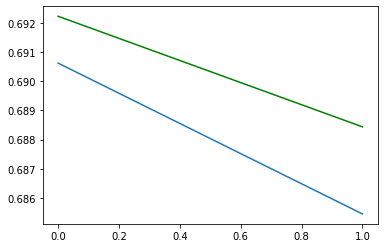

In [12]:
import matplotlib.pyplot as plt
plt.plot(hy.history['loss'],color='g')
plt.plot(hy.history['val_loss'])

In [ ]:
lstm의 입력은 시퀀셜로 들어가야함
lstm의 아웃풋은 하나의 값임
즉
lstm
lstm
연속으로 나열할 수   없음

그래서 리턴시퀀스를 이용하여 아웃풋을 시퀀스로 보내서 다음 엘엣스티엠을 나열할 수 잇음
m2,add(LSTM(8,dropout=0.3, return_sequences=True))
m2,add(LSTM(8,dropout=0.3))


In [ ]:
from keras.layers import GRU     # lstm이랑별차이없지만 간단한 데이터일 수록 gru가 좋음


m = Sequential()  
m.add(Embedding(500,16,input_length=100 ))  
  # 인풋렝스100  한묶음으로 한번에 들어가니까 한묶음의 길이 100으로
#심플rnn에 잇엇던 인풋이여기로 #500  500개단어   # 16 : 오백개의 단어를 16차원으로 정리    16차원으로 오백개의 단어를 표현하겠다.
    # 그래서 오백개로 원핫인코딩된 자료를 줄 필요가 없다  > 핏에서 c_ 대신 ck_
     # 원핫 안한 데이터를 자동으로 임베딩이 해준다
     # 16 차원에 점하나 찍은 벡터화  여기서 차원은 임의의 값 하이퍼매개변수
# 임베딩 단어 벡터화 - 임의의 좌표(16차원)에 한 점찍기
m.add( GRU( 8,emem드랍아웃.링턴시퀀스트루)) #순환신경망  # 8은 cell 셀 수  (뉴런수)                      # 심플알엔엔보다 파라미터가 늘엇다 - 추가적인기억을하겟다
m.add( GR
m.add(  Dense( 1, activation='sigmoid' ) ) #아웃풋1개   출력층 , 이진분류 시그모이드
m.summary()

In [ ]:
원핫을꼭해야하나
하는게좋은가
임베딩 원핫 vs 투카테고리 원핫
로스펑션은바이너리고정?
